In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data Preprocessing


In [2]:
df = pd.read_csv('KrishaData.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'KrishaData.csv'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       329 non-null    int64 
 1   Floor_area  329 non-null    object
 2   Const_year  329 non-null    int64 
 3   Address     329 non-null    object
dtypes: int64(2), object(2)
memory usage: 10.4+ KB


In [4]:
df.describe()

,Price,Const_year
count,3.290000e+02,329.000000
mean,3.503464e+07,2019.194529
std,1.031674e+07,1.795616
min,1.500000e+07,2016.000000
25%,2.800000e+07,2018.000000
50%,3.300000e+07,2020.000000
75%,4.000000e+07,2021.000000
max,8.000000e+07,2021.000000


In [62]:
#print(df.Address.unique())
add_unique = df.Address.unique()
ids = list(range(0, 329))
df['id'] = ids
df1 = df.copy()
floor_area = df1.Floor_area


In [63]:
floor_area_int = []
for area in floor_area:
    for i, ch in enumerate(area):
        if ch == 'м':
            floor_area_int.append(area[:i])
            break
print(floor_area_int)

['64 ', '80 ', '78.5 ', '55 ', '70.04 ', '60 ', '70 ', '66.7 ', '71 ', '58 ', '65.3 ', '70.28 ', '47.5 ', '50 ', '57 ', '70.96 ', '60 ', '85.18 ', '77.11 ', '88.81 ', '62.8 ', '56.1 ', '53.85 ', '43 ', '57 ', '54.96 ', '55.2 ', '56.12 ', '59 ', '58.1 ', '57.68 ', '65 ', '43 ', '43 ', '57.95 ', '58.01 ', '69.3 ', '72 ', '65 ', '62 ', '62 ', '62 ', '63.1 ', '62.5 ', '59 ', '60 ', '42 ', '47 ', '70 ', '68.91 ', '68.91 ', '69.8 ', '49 ', '58 ', '60.3 ', '63 ', '74 ', '45.2 ', '50 ', '60 ', '57 ', '46.6 ', '86 ', '57 ', '46.1 ', '52 ', '63.7 ', '58.4 ', '51.9 ', '52.4 ', '62 ', '45.4 ', '60 ', '72 ', '59 ', '60 ', '68 ', '75.3 ', '39 ', '73 ', '63 ', '61.5 ', '54.7 ', '64.5 ', '72 ', '59 ', '82 ', '70 ', '53 ', '51.5 ', '55.7 ', '72 ', '48 ', '65 ', '47 ', '56.6 ', '50.4 ', '64.1 ', '70 ', '53 ', '48 ', '70 ', '57 ', '57 ', '74.6 ', '60 ', '43 ', '58.7 ', '72 ', '61.1 ', '65 ', '76.2 ', '50 ', '61.5 ', '62.3 ', '69.3 ', '51 ', '66 ', '63.4 ', '44.2 ', '69.09 ', '60 ', '63 ', '60 ', '49 ', '

In [64]:
df1['Floor_area'] = floor_area_int
len(floor_area_int)

329

In [65]:
df1.head()

,Price,Floor_area,Const_year,Address,id
0,29900000,64,2021,Tole Bi,0
1,55500000,80,2016,Arnau Premium,1
2,43500000,78.5,2020,Apple City,2
3,34900000,55,2021,Варшава,3
4,42024000,70.04,2021,Landmark,4


In [66]:
df1['Floor_area'] = df1['Floor_area'].astype('float')

In [67]:
df1.dtypes

Price           int64
Floor_area    float64
Const_year      int64
Address        object
id              int64
dtype: object

# EDA

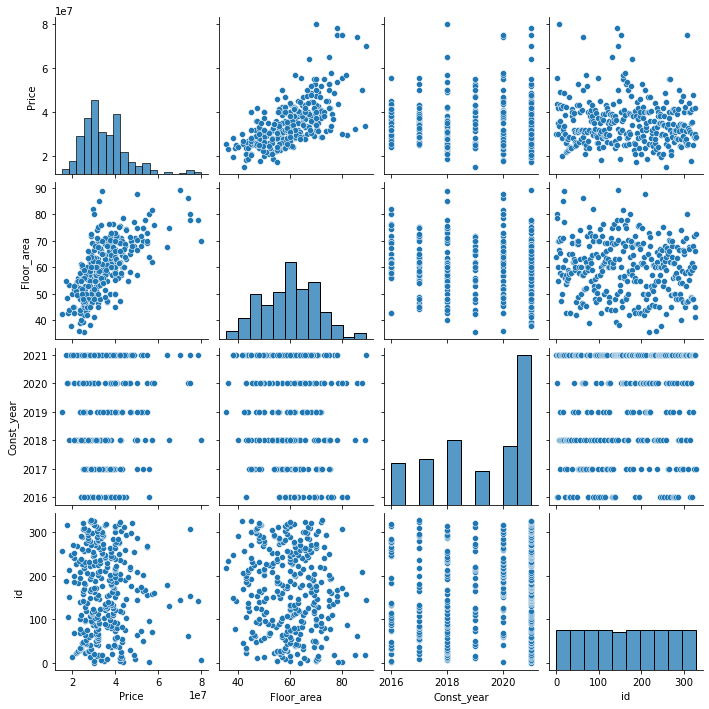

In [68]:
print(sns.pairplot(df1))

In [69]:
df1.corr()

,Price,Floor_area,Const_year,id
Price,1.000000,0.650675,-0.038212,-0.055665
Floor_area,0.650675,1.000000,-0.138259,-0.116527
Const_year,-0.038212,-0.138259,1.000000,0.142482
id,-0.055665,-0.116527,0.142482,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)


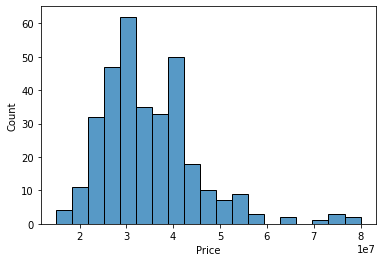

In [70]:
print(sns.histplot(df1['Price']))

In [71]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

price_no_outliers = remove_outlier(df1, 'Price')

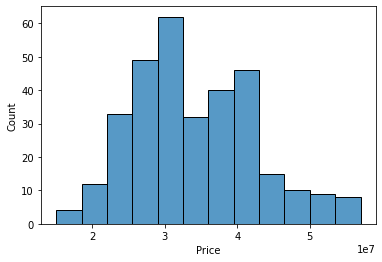

<Figure size 432x288 with 0 Axes>

In [72]:
sns.histplot(price_no_outliers['Price'])
plt.show()
plt.clf()

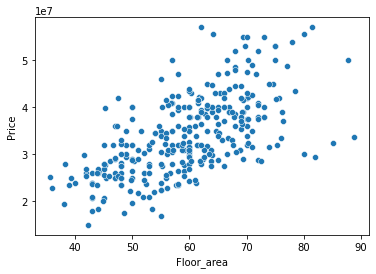

<Figure size 432x288 with 0 Axes>

In [73]:
sns.scatterplot(x=price_no_outliers['Floor_area'], y=price_no_outliers['Price'])
plt.show()
plt.clf()

In [74]:
X = price_no_outliers['Floor_area']
y = price_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=0)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [75]:
X.shape, y.shape
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((48, 1), (48,))

In [76]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [77]:
model.score(X_test, y_test)

0.4906013400240363

In [78]:
price_lst = price_no_outliers['Price']
area_lst = price_no_outliers['Floor_area']
area_lst = np.array(area_lst)
area_lst = area_lst.reshape(-1,1)
price_lst_sorted = []
area_lst[0]

array([64.])

In [79]:
predicted_price = model.predict(area_lst)
len(predicted_price)

320

In [80]:
for index, price in enumerate(price_lst):
    diff = predicted_price[index] - price
    price_lst_sorted.append([index, diff])

In [81]:
max(price_lst_sorted, key=lambda x: x[1])

[84, 15655710.079396889]

In [83]:
price_no_outliers[price_no_outliers['id'] == 84]

,Price,Floor_area,Const_year,Address,id
84,38000000,72.0,2017,Аруна,84


#### So as we can see the flat with id 84 is named as the most undervaluated